# Music Genres Over Time

## What genres have been most popular in the US over the years?

### A computational essay by Aaron Huang and Antoinette Tan, students at Olin College of Engineering.

Whenever you start or restart your notebook, run the following code cell to make sure that this notebook pulls in the latest version of your code:

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Introduction


Music is something we’ve all experienced before whether it is in a shopping mall, on the car radio, or in spotify playlists. That being said, we all listen to different kinds of music and have different tastes in genre. In this project, we attempted to answer the question: How have popular music genres changed over time in the United States? In order to answer this question we found the top songs in the United States from 1946 to 2020, found the genres associated with these songs, and visualized this data in three different ways. In doing this we were able to find the genres that have been most prevalent over the years, as well as genres that have come and go.

## Methodology

### Obtaining the Top Songs Over the Years

In order to find what genres have been popular over the years, we first looked at what songs have been popular. To do this, we scraped data from the top songs from the [billboard year end hot 100](https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2019) wikipedias for the years 1946 to 2020. This range of years was chosen based on the billboard hot 100 available to us.

Billboard year-end charts are a cumulative measure of a single or album’s performance in the United States, based upon the Billboard magazine charts during any given chart year. Before 1991, the year-end charts were calculated on an inverse-point system based solely on a title’s performance. A single appearing on the Billboard hot 100 would be given one point for a week spent at position 100, for example, or  100 points for a week spent at position one. Other factors included the total weeks a song spent on the chart and its peak position were calculated into the year-end total.

After 1991, Billboard began incorporating sales and airplay information and the year end charts are now calculated by a straightforward cumulative total of yearlong sales (or sales and airplay) points.

An example list of some of the wikipedia titles we used can be seen below.

In [2]:
import wikipedia

#Gets information from the wikipedia page
top_songs1950 = wikipedia.page("Billboard year-end top 30 singles of 1950")
# Gets a list of all the names of the articles for hot singles for each year, as these are listed\n",
# as links at the bottom of the page\n",
top_per_year_wikis = top_songs1950.links[10:83]
print(top_per_year_wikis[1:10])


['Billboard Year-End Hot 100 singles of 1961', 'Billboard Year-End Hot 100 singles of 1962', 'Billboard Year-End Hot 100 singles of 1963', 'Billboard Year-End Hot 100 singles of 1964', 'Billboard Year-End Hot 100 singles of 1965', 'Billboard Year-End Hot 100 singles of 1966', 'Billboard Year-End Hot 100 singles of 1967', 'Billboard Year-End Hot 100 singles of 1968', 'Billboard Year-End Hot 100 singles of 1969']


From these wikipedia pages we got the title of the top songs per year as well as the name of the artist(s). As seen in the title of the pages, not all of the charts were top 100. Therefore we had to normalize our data to 100, which we will discuss in detail in the data processing section.

### Obtaining the Top Genres Over the Years

After getting the top songs for each year, we needed to find the genre(s) associated with each song. To do this, we used the [discogs API](https://www.discogs.com/developers). The genres in Discogs are based on how releases are tagged by contributors. Genres are inherently subjective as it is hard to accurately describe a piece of music, but we believed that this was reliable enough as there are no objective standards for genre. The umbrella classifications of genre on the discogs database were decided by the discogs contributors when the database launched in 2000. To give an understanding of the definition of some genres, below are some examples of genres and their associated styles according to the [discog blog](https://blog.discogs.com/en/genres-and-styles/)


**Brass & Military**: Includes things like brass bands, marches, military and pipe and drum

**Blues**: Boogie Woogie, Chicago Blues, Electric Blues, Piano Blues, etc

**Children’s**: Educational, Nursery Rhymes, Story

**Classical**: Baroque, Choral, Contemporary, Early, Impressionist, Modern, Opera, etc.

**Electronic**: Chillwave, Dance-pop, Deep Techno, Disco, Electro Swing, Grime, Techno

**Folk, World and Country**: Aboriginal, Bhangra, Bluegrass, Chinese Classical, Nordic, etc.

**Find and Soul**: Boogie, Funk, Gospel, Rhythm and Blues, Soul, etc.

**Hip Hop**: Bass Music, Beat Box, Jazzy Hip-Hop, Pop Rap, RnB/Swing, Trap, etc

**Jazz**: Afrobeat, Bop, Avant-garde Jazz, Contemporary Jazz, Fusion, Ragtime, etc.

**Latin**: Afro-Cuban, Bachata, Cha-Cha, Mariachi, Tango, etc.

**Non-Music**: Audiobook, Comedy, Education, Poetry, Sermon, etc.

**Pop**: Ballad, Barbershop, Bollywood, City Pop, Indie Pop, K-pop, etc.

**Reggae**: Azonto, Calypso, Mento, etc.

**Rock**: Acoustic, Alternative Rock, Classic Rock, Deathcore, Grunge, Heavy Metal, Rock&Roll, Punk,  etc.

**Stage and Screen**: Caraberet, Musical, Score, Soundtrack, Video Game Music, etc.

Although the genre categories are very broad, they fit our purposes very well in giving us a broad overview of the genres over time. In addition, songs that had multiple genres listed we counted as two different genres. The reason for this being that are project is not seeking the genres of the top songs, but rather using the top songs as a means for telling us the landscape of the genres over time.

### Storing the Data

One we got the genres, we got rid of the titles and artists of the songs and stored the year and genres of the top songs in that year in a csv. Below is a dataframe that is an example of how data was stored in the csv.

In [3]:
import pandas as pd

csv_dataframe = pd.read_csv ('genre_year_data.csv')
print(csv_dataframe)

                           Genre  Year
0      ['Pop', 'Stage & Screen']  1960
1     ['Folk, World, & Country']  1960
2                ['Rock', 'Pop']  1960
3                       ['Rock']  1960
4                        ['Pop']  1960
...                          ...   ...
6584                     ['Pop']  1950
6585                     ['Pop']  1950
6586                    ['Jazz']  1950
6587                     ['Pop']  1950
6588             ['Rock', 'Pop']  1950

[6589 rows x 2 columns]


### Processing the Data

To process our data we read our data in from the csv, and counted up how many songs were in each genre for each year. Then for each year we normalized the data so that every year would have a total of 100 when all genres were added up. We did this because not all of the wikipedia pages had 100 songs, and because some songs had more than one genre associated with it. This means that some years have a lower resolution than others. We stored this information in a dictionary in a dictionary. The outer dictionary has the years as keys, and another dictionary of genres as the values. An example of the dictionary from 1946 to 1947 can be seen below. Also below is an example of the sum of one of the years, which is 100.

In [7]:
from count_genres_per_year import count_genres_per_year_normalized

count_genres_dict = count_genres_per_year_normalized('genre_year_data.csv', 1946, 2020)
example_dict = dict(list(count_genres_dict.items())[0:2])
print(example_dict)

print(f'The sum of all the genres in 1946 is {round(sum(count_genres_dict[1946].values()))}')

{1946: {'Pop': 55.357142857142854, 'Jazz': 30.357142857142858, 'Stage & Screen': 5.357142857142857, 'Folk World & Country': 3.5714285714285716, 'Funk / Soul': 1.7857142857142858, 'Rock': 1.7857142857142858, 'Reggae': 1.7857142857142858}, 1947: {'Jazz': 36.92307692307692, 'Blues': 3.076923076923077, 'Classical': 1.5384615384615385, 'Folk World & Country': 6.153846153846154, 'Stage & Screen': 3.076923076923077, 'Pop': 46.15384615384615, 'Non-Music': 3.076923076923077}}
The sum of all the genres in 1946 is 100


For some of our visualizations we needed a cumulative total for each year's genres. For example, if 1946 has 55 counts under pop, and 1947 has 46 count under pop, the cumulative total for 1947 would be 101 pop songs. An example of this is shown below.

In [9]:
from count_genres_per_year import accumulative_genre

accumulative_genre_dict = accumulative_genre('genre_year_data.csv', 1946, 2020)
example_cumulative = dict(list(accumulative_genre_dict.items())[0:2])
print(example_cumulative)


{1946: {'Pop': 55.357142857142854, 'Jazz': 30.357142857142858, 'Stage & Screen': 5.357142857142857, 'Folk World & Country': 3.5714285714285716, 'Funk / Soul': 1.7857142857142858, 'Rock': 1.7857142857142858, 'Reggae': 1.7857142857142858}, 1947: {'Pop': 101.51098901098901, 'Jazz': 67.28021978021978, 'Stage & Screen': 8.434065934065934, 'Folk World & Country': 9.725274725274726, 'Funk / Soul': 1.7857142857142858, 'Rock': 1.7857142857142858, 'Reggae': 1.7857142857142858, 'Blues': 3.076923076923077, 'Classical': 1.5384615384615385, 'Non-Music': 3.076923076923077}}


## Results

### Pi Charts

For this visualization, we plotted pi charts for different generations to see what music each generation grew up on. The definitions of the generations based on when they are born are as follows:

* **(Baby) Boomers**- 1946 to 1964
* **Gen X**- 1965 to 1980
* **Millenials**- 1981-1996
* **Gen Z**- 1997-2015
* **Gen Alpha**- 2016- present

Before making the pi charts, we got rid of any genres that made up less than 5% of the total genre count for each year as to make the charts less overwhelming.

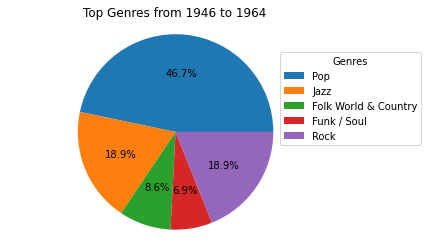

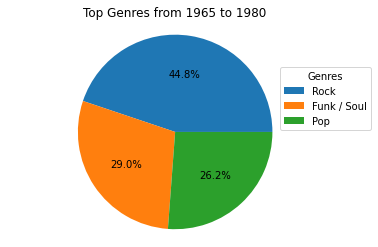

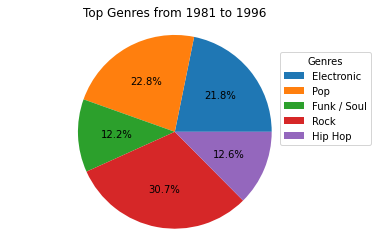

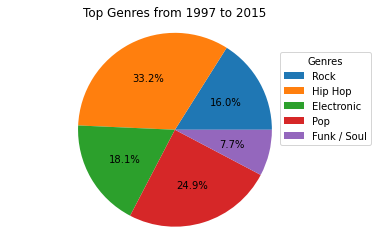

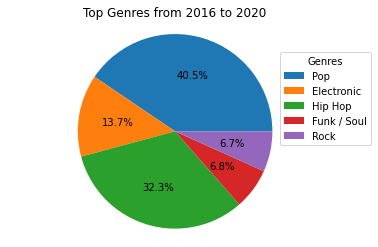

In [1]:
from visualizations import generate_pies
%matplotlib inline

generate_pies()

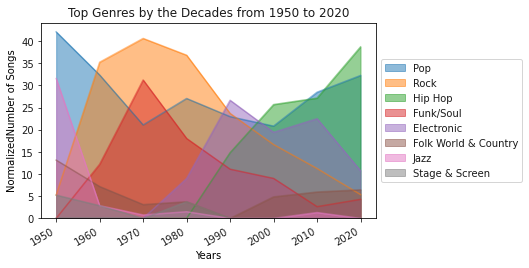

In [6]:
from visualizations import area_chart_decades

area_chart_decades()

In [1]:
from IPython.display import HTML
from visualizations import create_bar_chart_race

video_html = create_bar_chart_race()
HTML(video_html)    


/home/softdes/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/softdes/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
